## Extract SWIFT codes

* Randomly pick <= X SWIFT codes for each country
* Original dataset: [github.com/PeterNotenboom/SwiftCodes](https://github.com/PeterNotenboom/SwiftCodes)

In [1]:
import os
import json
import random

from glob import glob
from itertools import chain

import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['figure.dpi'] = 100

### Read data

In [2]:
json_dp = os.path.join('..', '..', 'SwiftCodes', 'AllCountries')
print(f'number of files found: {len(os.listdir(json_dp))}')

number of files found: 232


In [3]:
set([os.path.splitext(x)[1] for x in os.listdir(json_dp)])

{'.json'}

In [4]:
fps = glob(os.path.join(json_dp, '*json'))
len(fps)

232

In [5]:
def parse_swift_codes(fp: str) -> list[str]:
    with open(fp) as fin:
        data = json.load(fin)
    swift_codes = [x['swift_code'] for x in data['list']]
    return swift_codes

In [6]:
parsed = {os.path.splitext(os.path.basename(fp))[0]: parse_swift_codes(fp) for fp in fps}

### EDA

In [7]:
n_codes_per_country = {k: len(v) for k, v in parsed.items()}
n_codes_per_country = pd.Series(n_codes_per_country).sort_values(ascending=False)

print(f'total number of swift codes: {n_codes_per_country.sum()}')

total number of swift codes: 112887


In [8]:
n_codes_per_country.describe()

count      232.000000
mean       486.581897
std       2330.636730
min          1.000000
25%         14.000000
50%         44.000000
75%        161.500000
max      26259.000000
dtype: float64

In [9]:
n_codes_per_country.head(15).to_frame().T

,IT,GB,DE,US,FR,IN,CN,CH,TW,NL,RU,TR,HK,EG,AT
0,26259,20757,8518,5781,4924,4272,2652,1904,1889,1714,1646,1459,1362,1276,1191


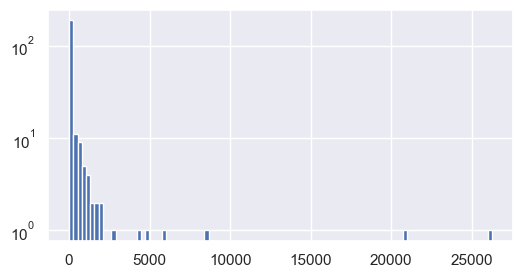

In [10]:
n_codes_per_country.hist(bins=100, log=True);

number of codes in filtered dataset: 31112


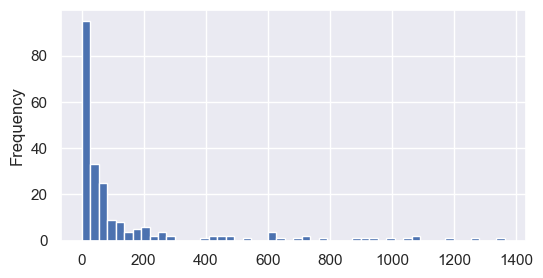

In [11]:
filtered = n_codes_per_country[n_codes_per_country < n_codes_per_country.quantile(0.95)]
print(f'number of codes in filtered dataset: {filtered.sum()}')
filtered.plot.hist(bins=50, log=False);

### Extract sample swift codes

In [12]:
max_picks = 100

codes_random = [random.sample(arr, min(max_picks, len(arr))) for arr in parsed.values()]

codes_concat = list(chain(*codes_random))
codes_concat = list(set(codes_concat))

print(f'number of randomly picked codes: {len(codes_concat)}')

number of randomly picked codes: 12088


In [13]:
out_fp = os.path.join('..', 'src', 'lib', 'SwiftCodes.js')
os.makedirs(os.path.dirname(out_fp), exist_ok=True)

In [14]:
out_lines = [f'\t"{code}",' for code in codes_concat]
out_lines = ['export const swiftCodes = [', ] + out_lines + ["]"]
out_lines = '\n'.join(out_lines)

In [15]:
with open(out_fp, 'w', encoding='utf-8') as fout:
    fout.write(out_lines)